In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd

In [3]:
## TO BE REPLACED WITH ARGUMENTS
data_folder = '../data/sample_data/F29_C266148/'
file_prefix = 'C266148_F29_01082024_DMS_gonogo_stim_training_'
addendum = ''
## END OF ARGUMENTS

# get list of files in data folder
files = os.listdir(data_folder)
# filter files by file prefix
filtered_files = [f for f in files if file_prefix in f]
# check if IterationData and TrialData and Metadata files are present
iteration_data_files = [f for f in filtered_files if ('IterationData'+addendum) in f]
assert len(iteration_data_files) == 1, 'More than one IterationData file found'
trial_data_files = [f for f in filtered_files if 'TrialData'+addendum in f]
assert len(trial_data_files) == 1, 'More than one TrialData file found'
metadata_files = [f for f in filtered_files if 'Metadata'+addendum in f]
assert len(metadata_files) == 1, 'More than one Metadata file found'
# get file names
iteration_data_file = iteration_data_files[0]
trial_data_file = trial_data_files[0]
metadata_file = metadata_files[0]

In [4]:
# open the Data files as csv
# trial_data = np.genfromtxt(data_folder + trial_data_file, delimiter=',', dtype=float)
# iteration_data = np.genfromtxt(data_folder + iteration_data_file, delimiter=',', dtype=float)

# % ITERATION MATRIX:
# % 1 - time elapsed
# % 2 - current trial
# % 3 - Air ON
# % 4 - Tone
# % 5 - Stim 1 valve
# % 6 - Stim 2 valve
# % 7 - Deliver water left
# % 8 - Deliver water right
# % 9 - Extend actuator
# % 10 - Retract actuator
# % 11 - Synch pulse
# % 12 - Puff punishment
# % 13 - Timeout punishment
# % 14 - Left Lickport Signal
# % 15 - Right Lickport Signal
# % 16 - Go Licks
# % 17 - NoGo Licks

iteration_data = pd.read_csv(data_folder + iteration_data_file, header=None, names=['time_elapsed', 'current_trial', 'air_on', 'tone', 'stim_1_valve', 'stim_2_valve', 'deliver_water_left', 'deliver_water_right', 'extend_actuator', 'retract_actuator', 'synch_pulse', 'puff_punishment', 'timeout_punishment', 'left_lickport_signal', 'right_lickport_signal', 'go_licks', 'nogo_licks'])

# % TRIAL MATRIX:
# % 1 - trial number
# % 2 - condition
# % 3 - delay
# % 4 - stim 1 first
# % 5 - stim 2 first
# % 6 - stim 1 second
# % 7 - stim 2 second
# % 8 - time of the start tone
# % 9 - time of the start of stim 1
# % 10 - time of the start of the delay
# % 11 - time of the start of stim 2
# % 12 - time of the start of the decision period
# % 13 - time of the start of the reinforcement period
# % 14 - time of the start of the ITI
# % 15 - licks left
# % 16 - licks right
# % 17 - total licks
# % 18 - correct
# % 19 - wrong
# % 20 - reward delivered
# % 21 - puff delivered
# % 22 - timeout delivered
# % 23 - probe trial

trial_data = pd.read_csv(data_folder + trial_data_file, header=None, names=['trial_number', 'condition', 'delay', 'stim_1_first', 'stim_2_first', 'stim_1_second', 'stim_2_second', 'start_tone', 'start_stim_1', 'start_delay', 'start_stim_2', 'start_decision', 'start_reinforcement', 'start_ITI', 'licks_left', 'licks_right', 'total_licks', 'correct', 'wrong', 'reward_delivered', 'puff_delivered', 'timeout_delivered', 'probe_trial'])
trial_data.set_index('trial_number', inplace=True)

# open the Metadata file as mat
metadata = loadmat(data_folder + metadata_file)
metadata_ = metadata['experiment_metadata'][0].copy()
metadata = {}
for n,i in enumerate(metadata_.dtype.names):
    if len(metadata_[0][n]) > 0:
        metadata[i] = metadata_[0][n][0].item()
    else:
        metadata[i] = ""

In [5]:
iteration_data.head()

,time_elapsed,current_trial,air_on,tone,stim_1_valve,stim_2_valve,deliver_water_left,deliver_water_right,extend_actuator,retract_actuator,synch_pulse,puff_punishment,timeout_punishment,left_lickport_signal,right_lickport_signal,go_licks,nogo_licks
0,0.00000,1,0,0,0,0,0,0,0,0,0,0,0,0.11084,0.134030,0,0
1,0.14170,1,0,0,0,0,0,0,0,0,0,0,0,4.32530,0.079917,0,0
2,0.17540,1,0,0,0,0,0,0,0,0,0,0,0,4.36010,0.105690,0,0
3,0.20812,1,0,0,0,0,0,0,0,0,0,0,0,0.13532,0.144340,0,0
4,0.24190,1,0,0,0,0,0,0,0,0,0,0,0,0.11728,0.140470,0,0


In [6]:
iteration_data.columns

Index(['time_elapsed', 'current_trial', 'air_on', 'tone', 'stim_1_valve',
       'stim_2_valve', 'deliver_water_left', 'deliver_water_right',
       'extend_actuator', 'retract_actuator', 'synch_pulse', 'puff_punishment',
       'timeout_punishment', 'left_lickport_signal', 'right_lickport_signal',
       'go_licks', 'nogo_licks'],
      dtype='object')

In [7]:
trial_data.head()

,condition,delay,stim_1_first,stim_2_first,stim_1_second,stim_2_second,start_tone,start_stim_1,start_delay,start_stim_2,...,start_ITI,licks_left,licks_right,total_licks,correct,wrong,reward_delivered,puff_delivered,timeout_delivered,probe_trial
trial_number,,,,,,,,,,,,,,,,,,,,,
1,1,5,1,0,0,1,3.3715,4.6259,7.9942,12.958,...,20.267,0,0,0,1,0,0,0,0,0
2,1,5,1,0,0,1,30.2790,31.5380,34.9160,39.878,...,47.197,0,0,0,1,0,0,0,0,0
3,1,5,1,0,0,1,57.1900,58.4720,61.8300,66.788,...,74.075,0,0,0,1,0,0,0,0,0
4,1,5,1,0,0,1,84.0610,85.3160,88.6900,93.641,...,100.900,0,0,0,1,0,0,0,0,0
5,1,5,1,0,0,1,110.9100,112.1700,115.5300,120.500,...,127.790,1,0,1,0,1,0,0,0,0


In [8]:
trial_data.columns

Index(['condition', 'delay', 'stim_1_first', 'stim_2_first', 'stim_1_second',
       'stim_2_second', 'start_tone', 'start_stim_1', 'start_delay',
       'start_stim_2', 'start_decision', 'start_reinforcement', 'start_ITI',
       'licks_left', 'licks_right', 'total_licks', 'correct', 'wrong',
       'reward_delivered', 'puff_delivered', 'timeout_delivered',
       'probe_trial'],
      dtype='object')

In [9]:
## PROCESSING

# Process lick data
def voltage_to_lick_onset(voltages,threshold=3.0):
    voltages = np.array(voltages)
    lick_onset = np.logical_and(voltages[:-1] < threshold, voltages[1:] > threshold)
    lick_onset = np.append(lick_onset, False)
    lick_onset = lick_onset.astype(int)
    return lick_onset

def voltage_to_lick_active(voltages,threshold=3.0):
    voltages = np.array(voltages)
    lick_active = voltages > threshold
    lick_active = lick_active.astype(int)
    return lick_active

if metadata['lickportBias'] == 0:
    iteration_data['lick_onset'] = voltage_to_lick_onset(iteration_data['left_lickport_signal'])
    iteration_data['lick_active'] = voltage_to_lick_active(iteration_data['left_lickport_signal'])
elif metadata['lickportBias'] == 1:
    iteration_data['lick_onset'] = voltage_to_lick_onset(iteration_data['right_lickport_signal'])
    iteration_data['lick_active'] = voltage_to_lick_active(iteration_data['right_lickport_signal'])
else:
    iteration_data['lick_onset'] = np.logical_or(voltage_to_lick_onset(iteration_data['left_lickport_signal']), voltage_to_lick_onset(iteration_data['right_lickport_signal'])).astype(int)
    iteration_data['lick_active'] = np.logical_or(voltage_to_lick_active(iteration_data['left_lickport_signal']), voltage_to_lick_active(iteration_data['right_lickport_signal'])).astype(int)

In [10]:
metadata.keys()

dict_keys(['outputFile', 'outputPath', 'name', 'cagenum', 'experimentName', 'lick_requirement', 'puff_punishment', 'blocked_vs_interleaved', 'ntrials', 'blockSize', 'matched_bias', 'stim_bias', 'lickportBias', 'startTone_to_stim1_delay', 'stim1_to_stim2_delay_mean', 'stim1_to_stim2_delay_std', 'decision_period_delay', 'decision_period', 'reward_period', 'ITI', 'timeout_period', 'p_probe_trials', 'integrate_licks', 'str_lickreq', 'str_puff', 'str_timeout', 'additional_str'])

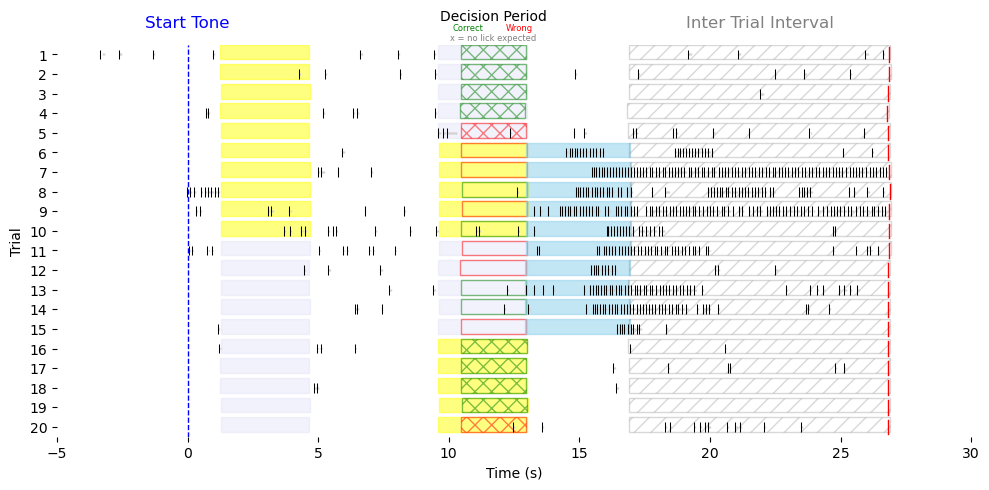

In [26]:
# get trial count from metadata
ntrials = metadata['ntrials']

decision_onsets = []
iti_onsets = []
end_times = []

# loop through trials and make lick rasters
fig, ax = plt.subplots(1,1,figsize=(10,5*ntrials/20))
for trial in range(1,ntrials+1):
    # find the lick onset times for this trial
    trial_mask = iteration_data['current_trial'] == trial
    
    # get trial data
    trial_time = iteration_data['time_elapsed'][trial_mask]
    trial_start_tone = iteration_data['tone'][trial_mask]

    # get trial start time
    start_time = trial_time[trial_start_tone == 1].values[0]

    # recenter trial time
    trial_time = trial_time - start_time

    # get the end of the trial
    end_time = trial_time.max()
    end_times.append(end_time)

    # draw the end of the trial as a vertical line for the trial 
    ax.add_line(plt.Line2D([end_time, end_time], [trial-0.375, trial+0.375], color='r', linewidth=1))



    # get stim onsets
    first_stim_onset = trial_data['start_stim_1'][trial] - start_time
    second_stim_onset = trial_data['start_stim_2'][trial] - start_time

    # get identity of stims
    trial_stim1_valve = iteration_data['stim_1_valve'][trial_mask]
    trial_stim2_valve = iteration_data['stim_2_valve'][trial_mask]

    # get stim valve values at the right time
    first_stim1_value = trial_stim1_valve[trial_time == first_stim_onset].values[0]
    first_stim2_value = trial_stim2_valve[trial_time == first_stim_onset].values[0]
    second_stim1_value = trial_stim1_valve[trial_time == second_stim_onset].values[0]
    second_stim2_value = trial_stim2_valve[trial_time == second_stim_onset].values[0]

    # get stim identity
    first_stim_identity = 0 if first_stim1_value == 1 else 1 if first_stim2_value == 1 else -1
    second_stim_identity = 0 if second_stim1_value == 1 else 1 if second_stim2_value == 1 else -1

    # draw the stim periods (start of stim + stim_wait) for the trial as a rectangle
    stim_wait = metadata['stim_wait'] if 'stim_wait' in metadata else 3.4
    ax.add_patch(plt.Rectangle((first_stim_onset, trial-0.5), stim_wait, 0.75, color= 'yellow' if first_stim_identity == 0 else 'lavender' if first_stim_identity == 1 else 'gray', alpha=0.5))
    ax.add_patch(plt.Rectangle((second_stim_onset, trial-0.5), stim_wait, 0.75, color= 'yellow' if second_stim_identity == 0 else 'lavender' if second_stim_identity == 1 else 'gray', alpha=0.5))

    # get start of decision period
    decision_onset = trial_data['start_decision'][trial] - start_time
    decision_onsets.append(decision_onset)

    # get if the trial was correct or not
    trial_correct = trial_data['correct'][trial]
    trial_wrong = trial_data['wrong'][trial]
    trial_correct = (trial_correct - trial_wrong + 1)//2
    rewarded_task = metadata['rewarded_task'] if 'rewarded_task' in metadata else ('match' if 'DMS' in file_prefix else 'non-match' if 'DNMS' in file_prefix else 'unknown')
    if first_stim_identity == second_stim_identity:
        rewarded_trial = 1 if rewarded_task == 'match' else 0 if rewarded_task == 'non-match' else -1
    else:
        rewarded_trial = 0 if rewarded_task == 'match' else 1 if rewarded_task == 'non-match' else -1
    
    # draw the decision period (red/green border rectangle based on trial_correct)
    decision_period = metadata['decision_period'] if 'decision_period' in metadata else 3.0
    ax.add_patch(plt.Rectangle((decision_onset, trial-0.5), decision_period, 0.75,
                                edgecolor='g' if trial_correct == 1 else 'r' if trial_correct == 0 else 'gray', 
                                hatch='' if rewarded_trial == 1 else 'xx' if rewarded_trial == 0 else None,
                                facecolor='none',alpha=0.5,
                                linewidth=1))

    # draw the reinforcement period (rectangle based on reward delivered or puff delivered or timeout delivered)
    reinforcement_onset = trial_data['start_reinforcement'][trial] - start_time
    reward_period = metadata['reward_period'] if 'reward_period' in metadata else 4.0
    timeout_period = metadata['timeout_period'] if 'timeout_period' in metadata else 5.0
    end_trial_early_if_not_rewarded = metadata['end_trial_early_if_not_rewarded'] if 'end_trial_early_if_not_rewarded' in metadata else 0
    puff_period = 0.5

    if trial_data['reward_delivered'][trial] == 1:
        ax.add_patch(plt.Rectangle((reinforcement_onset, trial-0.5), reward_period, 0.75, color='skyblue', alpha=0.5))
    else:
        if trial_data['puff_delivered'][trial] == 1:
            ax.add_patch(plt.Rectangle((reinforcement_onset, trial-0.5), puff_period, 0.75, color='pink', alpha=0.5))
        elif trial_data['timeout_delivered'][trial] == 1:
            ax.add_patch(plt.Rectangle((reinforcement_onset, trial-0.5), 
                                       timeout_period+reward_period if end_trial_early_if_not_rewarded == 1 else timeout_period,
                                        0.75, color='gray', alpha=0.5))
            
    # draw the ITI period (rectangle)
    ITI_onset = trial_data['start_ITI'][trial] - start_time
    ITI_period = metadata['ITI'] if 'ITI' in metadata else 20.0
    iti_onsets.append(ITI_onset)

    ax.add_patch(plt.Rectangle((ITI_onset, trial-0.5), ITI_period, 0.75, edgecolor='gray', facecolor='none', hatch='//', alpha=0.3))


    # get the lick data for this trial
    trial_lick_onset = trial_time[iteration_data['lick_onset'][trial_mask] == 1].values
    trial_lick_active = trial_time[iteration_data['lick_active'][trial_mask] == 1].values

    # draw the lick active as dotted lines
    ax.eventplot(trial_lick_active, lineoffsets=trial, colors='lightgray', linewidths=1, linelengths=0.1)
    # draw the lick raster
    ax.eventplot(trial_lick_onset, lineoffsets=trial, colors='k', linewidths=0.75, linelengths=0.5)

# Start Tone Label
ax.axvline(0, color='b', linestyle='--', linewidth=1)
ax.text(0, -1, 'Start Tone', color='b', fontsize=12, va='top', ha='center')

# Decision Period Label
ax.text(np.mean(decision_onsets)+decision_period/2, -1.3, 'Decision Period', color='k', fontsize=10, va='top', ha='center')
ax.text(np.mean(decision_onsets)+decision_period/10, -0.6, 'Correct', color='g', fontsize=6, va='top', ha='center')
ax.text(np.mean(decision_onsets)+9*decision_period/10, -0.6, 'Wrong', color='r', fontsize=6, va='top', ha='center')
ax.text(np.mean(decision_onsets)+decision_period/2, -0.1, 'x = no lick expected', color='gray', fontsize=6, va='top', ha='center')

# ITI Label
ax.text(np.mean(iti_onsets)+ITI_period/2, -1, 'Inter Trial Interval', color='gray', fontsize=12, va='top', ha='center')


ax.set_xlabel('Time (s)')
ax.set_xlim(-5, np.ceil(np.max(end_times)/5)*5)

ax.set_ylabel('Trial')
ax.set_yticks(np.arange(1,ntrials+1))
ax.set_ylim(0.5,ntrials+0.5)

ax.invert_yaxis() # invert y axis so that trial 1 is at the top
plt.box(False)
plt.tight_layout()

In [12]:
lick_active
# get streaks from lick active
streaks = []
current_streak = 0
for i in lick_active:
    if i == 1:
        current_streak += 1
    else:
        if current_streak > 0:
            streaks.append(current_streak)
        current_streak = 0
streaks = np.array(streaks)


NameError: name 'lick_active' is not defined

(array([153.,   9.,   3.,   3.,   3.,   2.,   0.,   2.,   2.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1.  ,   3.75,   6.5 ,   9.25,  12.  ,  14.75,  17.5 ,  20.25,
         23.  ,  25.75,  28.5 ,  31.25,  34.  ,  36.75,  39.5 ,  42.25,
         45.  ,  47.75,  50.5 ,  53.25,  56.  ,  58.75,  61.5 ,  64.25,
         67.  ,  69.75,  72.5 ,  75.25,  78.  ,  80.75,  83.5 ,  86.25,
         89.  ,  91.75,  94.5 

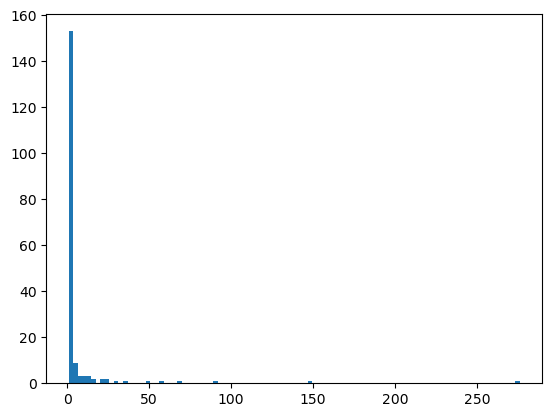

In [ ]:
plt.hist(streaks, bins=100)